# Title : Datasets & Visualizations 

# import necessary Files & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")
import string
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from raw_data import *
from clickbait_headline_training_model import get_title_of_url

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tabsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tabsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy of training model: 96.19%
16.74
19.93
18.85
20.15


# Create URL Arrays

In [2]:
#dictionary containing all skysports urls
skysports = {'SkySports URL':[ss_url1, ss_url2, ss_url3, ss_url4, ss_url5, ss_url6, ss_url7, ss_url8, ss_url9, ss_url10]}

#dictionary containing all espn urls
espn = {'ESPN URL':[espn_url1, espn_url2, espn_url3, espn_url4, espn_url5, espn_url6, espn_url7, espn_url8, espn_url9, espn_url10]}

#dictionary containing all cbs urls
cbssports = {'CBS URL':[cbs_url1, cbs_url2, cbs_url3, cbs_url4, cbs_url5, cbs_url6, cbs_url7, cbs_url8, cbs_url9, cbs_url10]}

#dictionary containing all controlwebistes urls
controlwebsites = {'ControlWeb URL':[cw_url1, cw_url2, cw_url3, cw_url4, cw_url5, cw_url6, cw_url7, cw_url8, cw_url9, cw_url10]}

#dictionary containing all urls:
all_urls = {'All URL':[ss_url1, ss_url2, ss_url3, ss_url4, ss_url5, ss_url6, ss_url7, ss_url8, ss_url9, ss_url10,
            espn_url1, espn_url2, espn_url3, espn_url4, espn_url5, espn_url6, espn_url7, espn_url8, espn_url9, espn_url10,
            cbs_url1, cbs_url2, cbs_url3, cbs_url4, cbs_url5, cbs_url6, cbs_url7, cbs_url8, cbs_url9, cbs_url10,
            cw_url1, cw_url2, cw_url3, cw_url4, cw_url5, cw_url6, cw_url7, cw_url8, cw_url9, cw_url10]}

# Create article dictionaries

In [3]:
#a dictionary containint all skysports articles:
ss_articles = {ss1, ss2, ss3, ss4, ss5, ss6, ss7, ss8, ss9, ss10}

#a dictionary containing all espn articles:
espn_articles = {espn1, espn2, espn3, espn4, espn5, espn6, espn7, espn8, espn9, espn10}

#a dictionary containing cbs articles
cbs_articles = {cbs1, cbs2, cbs3, cbs4, cbs5, cbs6, cbs7, cbs8, cbs9, cbs10}

#a dictionary containing all control websites articles
cw_articles = {cw1, cw2, cw3, cw4, cw5, cw6, cw7, cw8, cw9, cw10}

#a dictionary containing all of our articles
all_articles = {ss1, ss2, ss3, ss4, ss5, ss6, ss7, ss8, ss9, ss10,
                espn1, espn2, espn3, espn4, espn5, espn6, espn7, espn8, espn9, espn10,
                cbs1, cbs2, cbs3, cbs4, cbs5, cbs6, cbs7, cbs8, cbs9, cbs10,
                cw1, cw2, cw3, cw4, cw5, cw6, cw7, cw8, cw9, cw10}

# Get Polarity Score:
1) Make our articles lowercase
2) Remove punctuation
3) Tokenize our text
4) Remove stop words
5) Detokenize our text
6) Use Sentiment Intensity Analyzer to get polarity score
7) Store our polarity score in a dictionary

# Make Lowercase:

In [4]:
#a dictionary containint all skysports articles:
ss_lower = {ss1.lower(), ss2.lower(), ss3.lower(), ss4.lower(), ss5.lower(), 
               ss6.lower(), ss7.lower(), ss8.lower(), ss9.lower(), ss10.lower()}

#a dictionary containing all espn articles:
espn_articles = {espn1.lower(), espn2.lower(), espn3.lower(), espn4.lower(), 
                 espn5.lower(), espn6.lower(), espn7.lower(), espn8.lower(), espn9.lower(), espn10.lower()}

#a dictionary containing cbs articles
cbs_articles = {cbs1.lower(), cbs2.lower(), cbs3.lower(), cbs4.lower(), cbs5.lower(), 
                cbs6.lower(), cbs7.lower(), cbs8.lower(), cbs9.lower(), cbs10.lower()}

#a dictionary containing all control websites articles
cw_articles = {cw1.lower(), cw2.lower(), cw3.lower(), cw4.lower(), cw5.lower(), 
               cw6.lower(), cw7.lower(), cw8.lower(), cw9.lower(), cw10.lower()}

#a dictionary containing all of our articles
all_articles = {ss1.lower(), ss2.lower(), ss3.lower(), ss4.lower(), ss5.lower(), 
               ss6.lower(), ss7.lower(), ss8.lower(), ss9.lower(), ss10.lower(),
                espn1.lower(), espn2.lower(), espn3.lower(), espn4.lower(), 
                 espn5.lower(), espn6.lower(), espn7.lower(), espn8.lower(), espn9.lower(), espn10.lower(),
                cbs1.lower(), cbs2.lower(), cbs3.lower(), cbs4.lower(), cbs5.lower(), 
                cbs6.lower(), cbs7.lower(), cbs8.lower(), cbs9.lower(), cbs10.lower(),
                cw1.lower(), cw2.lower(), cw3.lower(), cw4.lower(), cw5.lower(), 
               cw6.lower(), cw7.lower(), cw8.lower(), cw9.lower(), cw10.lower()}

In [5]:
#Lets test if it works:
#print ss10 in lowercase
print(ss10.lower())


barcelona make chelsea's pierre-emerick aubameyang top no 9 target; liverpool's roberto firmino on shortlist
pierre-emerick aubameyang joined chelsea from barcelona last summer for £10.3m; striker has scored three goals in 20 games, although only 10 have been starts; 33-year-old scored 13 goals in 24 games for laliga leaders during the second half of last season
barcelona have made chelsea’s pierre-emerick aubameyang their top no 9 target this summer on a striker list that also includes liverpool’s roberto firmino.
the laliga leaders want to re-sign aubameyang, who made a lasting impression on the barca dressing room during his spell at the club last year, as competition for robert lewandowski.
manager xavi is understood to see the gabon striker as a slightly different option to the poland captain, but the financial aspect of re-signing him from chelsea will not be straightforward - and firmino will be a free agent when his liverpool contract expires on july 1.
aubameyang is understoo

# Remove Punctuation:

In [6]:
#Create a remove punctuation function
import string
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()
#test to see if our function is working
remove_punctuation(ss10.lower(),regular_punct)

'barcelona make chelsea s pierre emerick aubameyang top no 9 target  liverpool s roberto firmino on shortlist\npierre emerick aubameyang joined chelsea from barcelona last summer for £10 3m  striker has scored three goals in 20 games  although only 10 have been starts  33 year old scored 13 goals in 24 games for laliga leaders during the second half of last season\nbarcelona have made chelsea’s pierre emerick aubameyang their top no 9 target this summer on a striker list that also includes liverpool’s roberto firmino \nthe laliga leaders want to re sign aubameyang  who made a lasting impression on the barca dressing room during his spell at the club last year  as competition for robert lewandowski \nmanager xavi is understood to see the gabon striker as a slightly different option to the poland captain  but the financial aspect of re signing him from chelsea will not be straightforward   and firmino will be a free agent when his liverpool contract expires on july 1 \naubameyang is unde

In [7]:
#Remove punctuation from all the skysports articles
ss1_punct = remove_punctuation(ss1.lower(),regular_punct)
ss2_punct = remove_punctuation(ss2.lower(),regular_punct)
ss3_punct = remove_punctuation(ss3.lower(),regular_punct)
ss4_punct = remove_punctuation(ss4.lower(),regular_punct)
ss5_punct = remove_punctuation(ss5.lower(),regular_punct)
ss6_punct = remove_punctuation(ss6.lower(),regular_punct)
ss7_punct = remove_punctuation(ss7.lower(),regular_punct)
ss8_punct = remove_punctuation(ss8.lower(),regular_punct)
ss9_punct = remove_punctuation(ss9.lower(),regular_punct)
ss10_punct = remove_punctuation(ss10.lower(),regular_punct)

#remove punctuation from all the espn articles
espn1_punct = remove_punctuation(espn1.lower(),regular_punct)
espn2_punct = remove_punctuation(espn2.lower(),regular_punct)
espn3_punct = remove_punctuation(espn3.lower(),regular_punct)
espn4_punct = remove_punctuation(espn4.lower(),regular_punct)
espn5_punct = remove_punctuation(espn5.lower(),regular_punct)
espn6_punct = remove_punctuation(espn6.lower(),regular_punct)
espn7_punct = remove_punctuation(espn7.lower(),regular_punct)
espn8_punct = remove_punctuation(espn8.lower(),regular_punct)
espn9_punct = remove_punctuation(espn9.lower(),regular_punct)
espn10_punct = remove_punctuation(espn10.lower(),regular_punct)

#remove punctuation from all the cbs articles
cbs1_punct = remove_punctuation(cbs1.lower(),regular_punct)
cbs2_punct = remove_punctuation(cbs2.lower(),regular_punct)
cbs3_punct = remove_punctuation(cbs3.lower(),regular_punct)
cbs4_punct = remove_punctuation(cbs4.lower(),regular_punct)
cbs5_punct = remove_punctuation(cbs5.lower(),regular_punct)
cbs6_punct = remove_punctuation(cbs6.lower(),regular_punct)
cbs7_punct = remove_punctuation(cbs7.lower(),regular_punct)
cbs8_punct = remove_punctuation(cbs8.lower(),regular_punct)
cbs9_punct = remove_punctuation(cbs9.lower(),regular_punct)
cbs10_punct = remove_punctuation(cbs10.lower(),regular_punct)

#remove punctuation from all the control website articles
cw1_punct = remove_punctuation(cw1.lower(),regular_punct)
cw2_punct = remove_punctuation(cw2.lower(),regular_punct)
cw3_punct = remove_punctuation(cw3.lower(),regular_punct)
cw4_punct = remove_punctuation(cw4.lower(),regular_punct)
cw5_punct = remove_punctuation(cw5.lower(),regular_punct)
cw6_punct = remove_punctuation(cw6.lower(),regular_punct)
cw7_punct = remove_punctuation(cw7.lower(),regular_punct)
cw8_punct = remove_punctuation(cw8.lower(),regular_punct)
cw9_punct = remove_punctuation(cw9.lower(),regular_punct)
cw10_punct = remove_punctuation(cw10.lower(),regular_punct)

# Tokenize our articles:

In [8]:
#try a test method to see if task is working properly
from nltk.tokenize import word_tokenize

#Tokenize all our words in skysports:
ss1_tokenize = word_tokenize(ss1_punct)
ss2_tokenize = word_tokenize(ss2_punct)
ss3_tokenize = word_tokenize(ss3_punct)
ss4_tokenize = word_tokenize(ss4_punct)
ss5_tokenize = word_tokenize(ss5_punct)
ss6_tokenize = word_tokenize(ss6_punct)
ss7_tokenize = word_tokenize(ss7_punct)
ss8_tokenize = word_tokenize(ss8_punct)
ss9_tokenize = word_tokenize(ss9_punct)
ss10_tokenize = word_tokenize(ss10_punct)

#Tokenize all our words in espn:
espn1_tokenize = word_tokenize(espn1_punct)
espn2_tokenize = word_tokenize(espn2_punct)
espn3_tokenize = word_tokenize(espn3_punct)
espn4_tokenize = word_tokenize(espn4_punct)
espn5_tokenize = word_tokenize(espn5_punct)
espn6_tokenize = word_tokenize(espn6_punct)
espn7_tokenize = word_tokenize(espn7_punct)
espn8_tokenize = word_tokenize(espn8_punct)
espn9_tokenize = word_tokenize(espn9_punct)
espn10_tokenize = word_tokenize(espn10_punct)

#Tokenize all our words in cbs:
cbs1_tokenize = word_tokenize(cbs1_punct)
cbs2_tokenize = word_tokenize(cbs2_punct)
cbs3_tokenize = word_tokenize(cbs3_punct)
cbs4_tokenize = word_tokenize(cbs4_punct)
cbs5_tokenize = word_tokenize(cbs5_punct)
cbs6_tokenize = word_tokenize(cbs6_punct)
cbs7_tokenize = word_tokenize(cbs7_punct)
cbs8_tokenize = word_tokenize(cbs8_punct)
cbs9_tokenize = word_tokenize(cbs9_punct)
cbs10_tokenize = word_tokenize(cbs10_punct)

#Tokenize all our words in controlwebsite:
cw1_tokenize = word_tokenize(cw1_punct)
cw2_tokenize = word_tokenize(cw2_punct)
cw3_tokenize = word_tokenize(cw3_punct)
cw4_tokenize = word_tokenize(cw4_punct)
cw5_tokenize = word_tokenize(cw5_punct)
cw6_tokenize = word_tokenize(cw6_punct)
cw7_tokenize = word_tokenize(cw7_punct)
cw8_tokenize = word_tokenize(cw8_punct)
cw9_tokenize = word_tokenize(cw9_punct)
cw10_tokenize = word_tokenize(cw10_punct)

#Test to see if tokenization is working
print(len(ss1_tokenize))
print(ss1_tokenize)

1159
['lionel', 'messi', 'to', 'leave', 'psg', 'at', 'end', 'of', 'season', 'with', 'french', 'side', 'not', 'planning', 'to', 'offer', 'new', 'contract', 'lionel', 'messi', 'was', 'suspended', 'earlier', 'this', 'week', 'by', 'paris', 'saint', 'germain', 'for', 'going', 'on', 'a', 'personal', 'promotional', 'trip', 'to', 'saudi', 'arabia', 'without', 'permission', 'the', 'seven', 'time', 'ballon', 'd', 'or', 'winner', 's', 'two', 'year', 'deal', 'with', 'psg', 'ends', 'this', 'summer', 'and', 'he', 'is', 'now', 'set', 'to', 'leave', 'the', 'ligue', '1', 'side', 'on', 'a', 'free', 'transfer', 'lionel', 'messi', 'will', 'leave', 'paris', 'saint', 'germain', 'at', 'the', 'end', 'of', 'the', 'season', 'with', 'the', 'ligue', '1', 'club', 'not', 'planning', 'to', 'offer', 'the', 'forward', 'a', 'new', 'contract', 'messi', 'joined', 'psg', 'in', 'the', 'summer', 'of', '2021', 'on', 'a', 'two', 'year', 'deal', 'after', 'leaving', 'barcelona', 'due', 'to', 'their', 'financial', 'issues', 'the

# Remove Stop Words:

In [9]:
from nltk.corpus import stopwords
stop_words_array = set(stopwords.words('english'))
#remove stopwords for skysports:
ss1_sw =  []
for w in ss1_tokenize:
    if w not in stop_words_array:
        ss1_sw.append(w)
ss2_sw =  []
for w in ss2_tokenize:
    if w not in stop_words_array:
        ss2_sw.append(w)
ss3_sw =  []
for w in ss3_tokenize:
    if w not in stop_words_array:
        ss3_sw.append(w)
ss4_sw =  []
for w in ss4_tokenize:
    if w not in stop_words_array:
        ss4_sw.append(w)
ss5_sw =  []
for w in ss5_tokenize:
    if w not in stop_words_array:
        ss5_sw.append(w)
ss6_sw =  []
for w in ss6_tokenize:
    if w not in stop_words_array:
        ss6_sw.append(w)
ss7_sw =  []
for w in ss7_tokenize:
    if w not in stop_words_array:
        ss7_sw.append(w)
ss8_sw =  []
for w in ss8_tokenize:
    if w not in stop_words_array:
        ss8_sw.append(w)
ss9_sw =  []
for w in ss9_tokenize:
    if w not in stop_words_array:
        ss9_sw.append(w)
ss10_sw =  []
for w in ss10_tokenize:
    if w not in stop_words_array:
        ss10_sw.append(w)
#remove stopwords from espn articles
espn1_sw =  []
for w in espn1_tokenize:
    if w not in stop_words_array:
        espn1_sw.append(w)
espn2_sw =  []
for w in espn2_tokenize:
    if w not in stop_words_array:
        espn2_sw.append(w)
espn3_sw =  []
for w in espn3_tokenize:
    if w not in stop_words_array:
        espn3_sw.append(w)
espn4_sw =  []
for w in espn4_tokenize:
    if w not in stop_words_array:
        espn4_sw.append(w)
espn5_sw =  []
for w in espn5_tokenize:
    if w not in stop_words_array:
        espn5_sw.append(w)
espn6_sw =  []
for w in espn6_tokenize:
    if w not in stop_words_array:
        espn6_sw.append(w)
espn7_sw =  []
for w in espn7_tokenize:
    if w not in stop_words_array:
        espn7_sw.append(w)
espn8_sw =  []
for w in espn8_tokenize:
    if w not in stop_words_array:
        espn8_sw.append(w)
espn9_sw =  []
for w in espn9_tokenize:
    if w not in stop_words_array:
        espn9_sw.append(w)
espn10_sw =  []
for w in espn10_tokenize:
    if w not in stop_words_array:
        espn10_sw.append(w)
#remove stopwords from cbs articles
cbs1_sw =  []
for w in cbs1_tokenize:
    if w not in stop_words_array:
        cbs1_sw.append(w)
cbs2_sw =  []
for w in cbs2_tokenize:
    if w not in stop_words_array:
        cbs2_sw.append(w)
cbs3_sw =  []
for w in cbs3_tokenize:
    if w not in stop_words_array:
        cbs3_sw.append(w)
cbs4_sw =  []
for w in cbs4_tokenize:
    if w not in stop_words_array:
        cbs4_sw.append(w)
cbs5_sw =  []
for w in cbs5_tokenize:
    if w not in stop_words_array:
        cbs5_sw.append(w)
cbs6_sw =  []
for w in cbs6_tokenize:
    if w not in stop_words_array:
        cbs6_sw.append(w)
cbs7_sw =  []
for w in cbs7_tokenize:
    if w not in stop_words_array:
        cbs7_sw.append(w)
cbs8_sw =  []
for w in cbs8_tokenize:
    if w not in stop_words_array:
        cbs8_sw.append(w)
cbs9_sw =  []
for w in cbs9_tokenize:
    if w not in stop_words_array:
        cbs9_sw.append(w)
cbs10_sw =  []
for w in cbs10_tokenize:
    if w not in stop_words_array:
        cbs10_sw.append(w)
#remove stopwords from every control website article:
cw1_sw =  []
for w in cw1_tokenize:
    if w not in stop_words_array:
        cw1_sw.append(w)
cw2_sw =  []
for w in cw2_tokenize:
    if w not in stop_words_array:
        cw2_sw.append(w)
cw3_sw =  []
for w in cw3_tokenize:
    if w not in stop_words_array:
        cw3_sw.append(w)
cw4_sw =  []
for w in cw4_tokenize:
    if w not in stop_words_array:
        cw4_sw.append(w)
cw5_sw =  []
for w in cw5_tokenize:
    if w not in stop_words_array:
        cw5_sw.append(w)
cw6_sw =  []
for w in cw6_tokenize:
    if w not in stop_words_array:
        cw6_sw.append(w)
cw7_sw =  []
for w in cw7_tokenize:
    if w not in stop_words_array:
        cw7_sw.append(w)
cw8_sw =  []
for w in cw8_tokenize:
    if w not in stop_words_array:
        cw8_sw.append(w)
cw9_sw =  []
for w in cw9_tokenize:
    if w not in stop_words_array:
        cw9_sw.append(w)
cw10_sw =  []
for w in cw10_tokenize:
    if w not in stop_words_array:
        cw10_sw.append(w)

In [10]:
#test to see if it is working
print(len(ss1_sw))
print(ss1_sw)

623
['lionel', 'messi', 'leave', 'psg', 'end', 'season', 'french', 'side', 'planning', 'offer', 'new', 'contract', 'lionel', 'messi', 'suspended', 'earlier', 'week', 'paris', 'saint', 'germain', 'going', 'personal', 'promotional', 'trip', 'saudi', 'arabia', 'without', 'permission', 'seven', 'time', 'ballon', 'winner', 'two', 'year', 'deal', 'psg', 'ends', 'summer', 'set', 'leave', 'ligue', '1', 'side', 'free', 'transfer', 'lionel', 'messi', 'leave', 'paris', 'saint', 'germain', 'end', 'season', 'ligue', '1', 'club', 'planning', 'offer', 'forward', 'new', 'contract', 'messi', 'joined', 'psg', 'summer', '2021', 'two', 'year', 'deal', 'leaving', 'barcelona', 'due', 'financial', 'issues', '35', 'year', 'old', 'played', '71', 'times', 'french', 'side', 'scoring', '31', 'goals', 'recording', '34', 'assists', 'lifting', 'title', '2022', 'sky', 'sports', 'news', 'also', 'understands', 'psg', 'would', 'willing', 'listen', 'offers', 'neymar', 'summer', 'psg', 'condemned', 'actions', 'supporters'

# Detokenize our articles:

In [11]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
#Detokenize our skysports articles
ss1_dtk = TreebankWordDetokenizer().detokenize(ss1_sw)
ss2_dtk = TreebankWordDetokenizer().detokenize(ss2_sw)
ss3_dtk = TreebankWordDetokenizer().detokenize(ss3_sw)
ss4_dtk = TreebankWordDetokenizer().detokenize(ss4_sw)
ss5_dtk = TreebankWordDetokenizer().detokenize(ss5_sw)
ss6_dtk = TreebankWordDetokenizer().detokenize(ss6_sw)
ss7_dtk = TreebankWordDetokenizer().detokenize(ss7_sw)
ss8_dtk = TreebankWordDetokenizer().detokenize(ss8_sw)
ss9_dtk = TreebankWordDetokenizer().detokenize(ss9_sw)
ss10_dtk = TreebankWordDetokenizer().detokenize(ss10_sw)
#Detokenize our espn articles
espn1_dtk = TreebankWordDetokenizer().detokenize(espn1_sw)
espn2_dtk = TreebankWordDetokenizer().detokenize(espn2_sw)
espn3_dtk = TreebankWordDetokenizer().detokenize(espn3_sw)
espn4_dtk = TreebankWordDetokenizer().detokenize(espn4_sw)
espn5_dtk = TreebankWordDetokenizer().detokenize(espn5_sw)
espn6_dtk = TreebankWordDetokenizer().detokenize(espn6_sw)
espn7_dtk = TreebankWordDetokenizer().detokenize(espn7_sw)
espn8_dtk = TreebankWordDetokenizer().detokenize(espn8_sw)
espn9_dtk = TreebankWordDetokenizer().detokenize(espn9_sw)
espn10_dtk = TreebankWordDetokenizer().detokenize(espn10_sw)
#Detokenize our cbs articles
cbs1_dtk = TreebankWordDetokenizer().detokenize(cbs1_sw)
cbs2_dtk = TreebankWordDetokenizer().detokenize(cbs2_sw)
cbs3_dtk = TreebankWordDetokenizer().detokenize(cbs3_sw)
cbs4_dtk = TreebankWordDetokenizer().detokenize(cbs4_sw)
cbs5_dtk = TreebankWordDetokenizer().detokenize(cbs5_sw)
cbs6_dtk = TreebankWordDetokenizer().detokenize(cbs6_sw)
cbs7_dtk = TreebankWordDetokenizer().detokenize(cbs7_sw)
cbs8_dtk = TreebankWordDetokenizer().detokenize(cbs8_sw)
cbs9_dtk = TreebankWordDetokenizer().detokenize(cbs9_sw)
cbs10_dtk = TreebankWordDetokenizer().detokenize(cbs10_sw)
#Detokenize our control website articles
cw1_dtk = TreebankWordDetokenizer().detokenize(cw1_sw)
cw2_dtk = TreebankWordDetokenizer().detokenize(cw2_sw)
cw3_dtk = TreebankWordDetokenizer().detokenize(cw3_sw)
cw4_dtk = TreebankWordDetokenizer().detokenize(cw4_sw)
cw5_dtk = TreebankWordDetokenizer().detokenize(cw5_sw)
cw6_dtk = TreebankWordDetokenizer().detokenize(cw6_sw)
cw7_dtk = TreebankWordDetokenizer().detokenize(cw7_sw)
cw8_dtk = TreebankWordDetokenizer().detokenize(cw8_sw)
cw9_dtk = TreebankWordDetokenizer().detokenize(cw9_sw)
cw10_dtk = TreebankWordDetokenizer().detokenize(cw10_sw)

In [12]:
#test to see if it is working
print(len(ss1_dtk))
print(len(ss1))
print(ss1_dtk)

4183
6286
lionel messi leave psg end season french side planning offer new contract lionel messi suspended earlier week paris saint germain going personal promotional trip saudi arabia without permission seven time ballon winner two year deal psg ends summer set leave ligue 1 side free transfer lionel messi leave paris saint germain end season ligue 1 club planning offer forward new contract messi joined psg summer 2021 two year deal leaving barcelona due financial issues 35 year old played 71 times french side scoring 31 goals recording 34 assists lifting title 2022 sky sports news also understands psg would willing listen offers neymar summer psg condemned actions supporters understood gathered outside home neymar chanted leave club wednesday night fans filmed chanting board resign outside club headquarters clips showed group supporters visit home neymar called move paris saint germain strongly condemns intolerable insulting actions small group individuals took place wednesday club s

# Get Polarity Score:

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
#get polarity score for skysports articles:
ss1_ps = sia.polarity_scores(ss1_dtk)
ss2_ps = sia.polarity_scores(ss2_dtk)
ss3_ps = sia.polarity_scores(ss3_dtk)
ss4_ps = sia.polarity_scores(ss4_dtk)
ss5_ps = sia.polarity_scores(ss5_dtk)
ss6_ps = sia.polarity_scores(ss6_dtk)
ss7_ps = sia.polarity_scores(ss7_dtk)
ss8_ps = sia.polarity_scores(ss8_dtk)
ss9_ps = sia.polarity_scores(ss9_dtk)
ss10_ps = sia.polarity_scores(ss10_dtk)
#get polarity scores for espn articles:
espn1_ps = sia.polarity_scores(espn1_dtk)
espn2_ps = sia.polarity_scores(espn2_dtk)
espn3_ps = sia.polarity_scores(espn3_dtk)
espn4_ps = sia.polarity_scores(espn4_dtk)
espn5_ps = sia.polarity_scores(espn5_dtk)
espn6_ps = sia.polarity_scores(espn6_dtk)
espn7_ps = sia.polarity_scores(espn7_dtk)
espn8_ps = sia.polarity_scores(espn8_dtk)
espn9_ps = sia.polarity_scores(espn9_dtk)
espn10_ps = sia.polarity_scores(espn10_dtk)
#get polarity score for cbs articles:
cbs1_ps = sia.polarity_scores(cbs1_dtk)
cbs2_ps = sia.polarity_scores(cbs2_dtk)
cbs3_ps = sia.polarity_scores(cbs3_dtk)
cbs4_ps = sia.polarity_scores(cbs4_dtk)
cbs5_ps = sia.polarity_scores(cbs5_dtk)
cbs6_ps = sia.polarity_scores(cbs6_dtk)
cbs7_ps = sia.polarity_scores(cbs7_dtk)
cbs8_ps = sia.polarity_scores(cbs8_dtk)
cbs9_ps = sia.polarity_scores(cbs9_dtk)
cbs10_ps = sia.polarity_scores(cbs10_dtk)
#get polarity score for control website articles:
cw1_ps = sia.polarity_scores(cw1_dtk)
cw2_ps = sia.polarity_scores(cw2_dtk)
cw3_ps = sia.polarity_scores(cw3_dtk)
cw4_ps = sia.polarity_scores(cw4_dtk)
cw5_ps = sia.polarity_scores(cw5_dtk)
cw6_ps = sia.polarity_scores(cw6_dtk)
cw7_ps = sia.polarity_scores(cw7_dtk)
cw8_ps = sia.polarity_scores(cw8_dtk)
cw9_ps = sia.polarity_scores(cw9_dtk)
cw10_ps = sia.polarity_scores(cw10_dtk)

In [14]:
#Test to see our polarity score
print(ss1_ps)

{'neg': 0.067, 'neu': 0.751, 'pos': 0.182, 'compound': 0.9976}


# Store Polarity Score in Arrays:

In [15]:
#a dictionary containint all skysports polarity scores:
ss_PolaritScore = [ss1_ps, ss2_ps, ss3_ps, ss4_ps, ss5_ps, ss6_ps, ss7_ps, ss8_ps, ss9_ps, ss10_ps]

#a dictionary containing all espn polarity scores:
espn_PolaritScore = [espn1_ps, espn2_ps, espn3_ps, espn4_ps, espn5_ps, espn6_ps, espn7_ps, espn8_ps, espn9_ps, espn10_ps]

#a dictionary containing cbs polarity scores:
cbs_PolaritScore = [cbs1_ps, cbs2_ps, cbs3_ps, cbs4_ps, cbs5_ps, cbs6_ps, cbs7_ps, cbs8_ps, cbs9_ps, cbs10_ps]

#a dictionary containing all control websites polarity scores:
cw_PolaritScore = [cw1_ps, cw2_ps, cw3_ps, cw4_ps, cw5_ps, cw6_ps, cw7_ps, cw8_ps, cw9_ps, cw10_ps]

#a dictionary containing all of our polarity scores:
all_PolaritScore = [ss1_ps, ss2_ps, ss3_ps, ss4_ps, ss5_ps, ss6_ps, ss7_ps, ss8_ps, ss9_ps, ss10_ps,
                espn1_ps, espn2_ps, espn3_ps, espn4_ps, espn5_ps, espn6_ps, espn7_ps, espn8_ps, espn9_ps, espn10_ps,
                cbs1_ps, cbs2_ps, cbs3_ps, cbs4_ps, cbs5_ps, cbs6_ps, cbs7_ps, cbs8_ps, cbs9_ps, cbs10_ps,
                cw1_ps, cw2_ps, cw3_ps, cw4_ps, cw5_ps, cw6_ps, cw7_ps, cw8_ps, cw9_ps, cw10_ps]

# Get Title Of URL:

In [16]:
from clickbait_headline_training_model import get_title_of_url
#Get title of all our skysports URL:
ss_title1 = get_title_of_url(ss_url1)
ss_title2 = get_title_of_url(ss_url2)
ss_title3 = get_title_of_url(ss_url3)
ss_title4 = get_title_of_url(ss_url4)
ss_title5 = get_title_of_url(ss_url5)
ss_title6 = get_title_of_url(ss_url6)
ss_title7 = get_title_of_url(ss_url7)
ss_title8 = get_title_of_url(ss_url8)
ss_title9 = get_title_of_url(ss_url9)
ss_title10 = get_title_of_url(ss_url10)
#Get title of all our ESPN URL:
espn_title1 = get_title_of_url(espn_url1)
espn_title2 = get_title_of_url(espn_url2)
espn_title3 = get_title_of_url(espn_url3)
espn_title4 = get_title_of_url(espn_url4)
espn_title5 = get_title_of_url(espn_url5)
espn_title6 = get_title_of_url(espn_url6)
espn_title7 = get_title_of_url(espn_url7)
espn_title8 = get_title_of_url(espn_url8)
espn_title9 = get_title_of_url(espn_url9)
espn_title10 = get_title_of_url(espn_url10)
#Get title of all our CBS URL:
cbs_title1 = get_title_of_url(cbs_url1)
cbs_title2 = get_title_of_url(cbs_url2)
cbs_title3 = get_title_of_url(cbs_url3)
cbs_title4 = get_title_of_url(cbs_url4)
cbs_title5 = get_title_of_url(cbs_url5)
cbs_title6 = get_title_of_url(cbs_url6)
cbs_title7 = get_title_of_url(cbs_url7)
cbs_title8 = get_title_of_url(cbs_url8)
cbs_title9 = get_title_of_url(cbs_url9)
cbs_title10 = get_title_of_url(cbs_url10)
#Get title of all our control websites URL:
cw_title1 = get_title_of_url(cw_url1)
cw_title2 = get_title_of_url(cw_url2)
cw_title3 = get_title_of_url(cw_url3)
cw_title4 = get_title_of_url(cw_url4)
cw_title5 = get_title_of_url(cw_url5)
cw_title6 = get_title_of_url(cw_url6)
cw_title7 = get_title_of_url(cw_url7)
cw_title8 = get_title_of_url(cw_url8)
cw_title9 = get_title_of_url(cw_url9)
cw_title10 = get_title_of_url(cw_url10)

In [17]:
#test to see if our titles work:
print(ss_title1)

Lionel Messi to leave PSG at end of season with French side not planning to offer new contract | Transfer Centre News | Sky Sports


# Store titles in Arrays:

In [18]:
#dictionary containing all skysports urls
skysports_titles = [ss_title1, ss_title2, ss_title3, ss_title4, ss_title5, ss_title6, 
                    ss_title7, ss_title8, ss_title9, ss_title10]

#dictionary containing all espn urls
espn_titles = [espn_title1, espn_title2, espn_title3, espn_title4, espn_title5, espn_title6, 
               espn_title7, espn_title8, espn_title9, espn_title10]

#dictionary containing all cbs urls
cbssports_titles = [cbs_title1, cbs_title2, cbs_title3, cbs_title4, cbs_title5, cbs_title6, 
                    cbs_title7, cbs_title8, cbs_title9, cbs_title10]

#dictionary containing all controlwebistes urls
controlwebsites_title = [cw_title1, cw_title2, cw_title3, cw_title4, cw_title5, cw_title6, 
                         cw_title7, cw_title8, cw_title9, cw_title10]

#dictionary containing all urls:
all_titles = [ss_title1, ss_title2, ss_title3, ss_title4, ss_title5, ss_title6, ss_title7, ss_title8, ss_title9, ss_title10,
            espn_title1, espn_title2, espn_title3, espn_title4, espn_title5, espn_title6, espn_title7, espn_title8, espn_title9, espn_title10,
            cbs_title1, cbs_title2, cbs_title3, cbs_title4, cbs_title5, cbs_title6, cbs_title7, cbs_title8, cbs_title9, cbs_title10,
            cw_title1, cw_title2, cw_title3, cw_title4, cw_title5, cw_title6, cw_title7, cw_title8, cw_title9, cw_title10]

# Modification of clickbait_headline_training_model FILE: 

In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from article_urls import *
from bs4 import BeautifulSoup
import requests
from clickbait_headline_training_model import get_title_of_url

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("clickbait_and_nonclickbait.csv")

# Preprocess the headlines column
stop_words = stopwords.words('english')
punct_marks = string.punctuation

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and nonalphanumeric characters
    tokens = [token for token in tokens if token not in stop_words and token not in punct_marks]
    # Join the tokens back into a string
    text = " ".join(tokens)
    return text

# Preprocessing dataset
df["headline"] = df["headline"].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["headline"], df["clickbait"], test_size=0.2, random_state=42)

# Define the machine learning pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Train the model
text_clf.fit(X_train, y_train)

# Evaluate the model and print accuracy
y_pred = text_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of training model: {:.2f}%".format(accuracy * 100))

# def print likelihood of clickbait
def is_clickbait(probability):
    probability = float(probability)
    if(probability < 25):
        print("The headline is very likely not clickbait")
    elif (probability < 50):
        print("The headline is likely not clickbait")
    elif (probability < 75):
        print("The headline is likely clickbait")
    elif (probability >= 75):
        print("The headline is very likely clickbait")

def parse_urls (array_of_urls):
    prob_score = []
    for url in array_of_urls:
        url_title = get_title_of_url(url)
        if url_title == False or url_title == "403 Forbidden": # Error Handling
            continue
        url_prob = text_clf.predict_proba([url_title])
        url_clickbait_prob = "{:.2f}".format(url_prob[0][1] * 100)
        url_clickbait_prob = float(url_clickbait_prob)
        prob_score.append(url_clickbait_prob)
    return prob_score


skysports_arr = parse_urls(skysports)
espn_arr = parse_urls(espn)
cbssports_arr = parse_urls(cbssports)
controlwebsites_arr = parse_urls(controlwebsites)

skysports_avg = "{:.2f}".format(sum(skysports_arr) / len(skysports_arr))
espn_avg = "{:.2f}".format(sum(espn_arr) / len(espn_arr))
cbssports_avg = "{:.2f}".format(sum(cbssports_arr) / len(cbssports_arr))
controlwebsites_avg = "{:.2f}".format(sum(controlwebsites_arr) / len(controlwebsites_arr))

print(f"SkySports: {skysports_avg}")
print(f"ESPN: {espn_avg}")
print(f"CBS: {cbssports_avg}")
print(f"control: {controlwebsites_avg}")






Accuracy of training model: 96.19%
SkySports: 16.74
ESPN: 19.93
CBS: 18.85
control: 20.15


# Average Clickbait Score Visualization:

<function matplotlib.pyplot.show(close=None, block=None)>

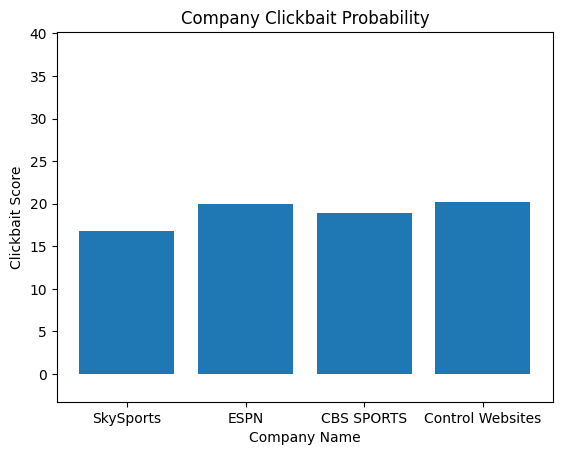

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
y_axis = [float(skysports_avg), float(espn_avg), float(cbssports_avg), float(controlwebsites_avg)]
x_axis = ['SkySports', 'ESPN', 'CBS SPORTS', 'Control Websites']
plt.bar(x_axis, y_axis)
plt.title('Company Clickbait Probability')
plt.xlabel('Company Name')
plt.ylabel('Clickbait Score')
max_y_lim = max(y_axis) + 20
min_y_lim = min(y_axis) - 20
plt.ylim(min_y_lim, max_y_lim)
#plt.figure(figsize(16,9))
plt.show

# Get Clickbait Score For every individual URL:

In [21]:
# get clickbait score for every individual url
def parse_individual_urls(url):
    url_title = get_title_of_url(url)
    url_prob = text_clf.predict_proba([url_title])
    url_clickbait_prob = "{:.2f}".format(url_prob[0][1] * 100)
    ind_url_clickbait_prob = float(url_clickbait_prob)
    return ind_url_clickbait_prob
#Get clickbait score for all individual skysports article
ss_cb1 = parse_individual_urls(ss_url1)
ss_cb2 = parse_individual_urls(ss_url2)
ss_cb3 = parse_individual_urls(ss_url3)
ss_cb4 = parse_individual_urls(ss_url4)
ss_cb5 = parse_individual_urls(ss_url5)
ss_cb6 = parse_individual_urls(ss_url6)
ss_cb7 = parse_individual_urls(ss_url7)
ss_cb8 = parse_individual_urls(ss_url8)
ss_cb9 = parse_individual_urls(ss_url9)
ss_cb10 = parse_individual_urls(ss_url10)
#Get clickbait score for all individual espn articles
espn_cb1 = 0 #parse_individual_urls(espn_url1)
espn_cb2 = parse_individual_urls(espn_url2)
espn_cb3 = parse_individual_urls(espn_url3)
espn_cb4 = parse_individual_urls(espn_url4)
espn_cb5 = parse_individual_urls(espn_url5)
espn_cb6 = parse_individual_urls(espn_url6)
espn_cb7 = parse_individual_urls(espn_url7)
espn_cb8 = parse_individual_urls(espn_url8)
espn_cb9 = parse_individual_urls(espn_url9)
espn_cb10 = parse_individual_urls(espn_url10)
#Get clickbait score for all individual cbs articles
cbs_cb1 = parse_individual_urls(cbs_url1)
cbs_cb2 = parse_individual_urls(cbs_url2)
cbs_cb3 = parse_individual_urls(cbs_url3)
cbs_cb4 = parse_individual_urls(cbs_url4)
cbs_cb5 = parse_individual_urls(cbs_url5)
cbs_cb6 = parse_individual_urls(cbs_url6)
cbs_cb7 = parse_individual_urls(cbs_url7)
cbs_cb8 = parse_individual_urls(cbs_url8)
cbs_cb9 = parse_individual_urls(cbs_url9)
cbs_cb10 = parse_individual_urls(cbs_url10)
#Get clickbait score for all individual control website articles
cw_cb1 = parse_individual_urls(cw_url1)
cw_cb2 = parse_individual_urls(cw_url2)
cw_cb3 = parse_individual_urls(cw_url3)
cw_cb4 = parse_individual_urls(cw_url4)
cw_cb5 = parse_individual_urls(cw_url5)
cw_cb6 = parse_individual_urls(cw_url6)
cw_cb7 = parse_individual_urls(cw_url7)
cw_cb8 = parse_individual_urls(cw_url8)
cw_cb9 = parse_individual_urls(cw_url9)
cw_cb10 = parse_individual_urls(cw_url10)

In [22]:
#test to see if clickbait score is working
print(ss_cb2)

2.07


# Clickbait Score Array

In [23]:
ss_clickbait = [ss_cb1, ss_cb2, ss_cb3, ss_cb4, ss_cb5, ss_cb6, ss_cb7, ss_cb8, ss_cb9, ss_cb10]
espn_clickbait = [espn_cb1, espn_cb2, espn_cb3, espn_cb4, espn_cb5, espn_cb6, espn_cb7, espn_cb8, 
                  espn_cb9, espn_cb10]
cbs_clickbait = [cbs_cb1, cbs_cb2, cbs_cb3, cbs_cb4, cbs_cb5, cbs_cb6, cbs_cb7, cbs_cb8, cbs_cb9, cbs_cb10]
cw_clickbait = [cw_cb1, cw_cb2, cw_cb3, cw_cb4, cw_cb5, cw_cb6, cw_cb7, cw_cb8, cw_cb9, cw_cb10]
all_clickbait = [ss_cb1, ss_cb2, ss_cb3, ss_cb4, ss_cb5, ss_cb6, ss_cb7, ss_cb8, ss_cb9, ss_cb10,
                 espn_cb1, espn_cb2, espn_cb3, espn_cb4, espn_cb5, espn_cb6, espn_cb7, espn_cb8, espn_cb9, espn_cb10, 
                 cbs_cb1, cbs_cb2, cbs_cb3, cbs_cb4, cbs_cb5, cbs_cb6, cbs_cb7, cbs_cb8, cbs_cb9, cbs_cb10, 
                 cw_cb1, cw_cb2, cw_cb3, cw_cb4, cw_cb5, cw_cb6, cw_cb7, cw_cb8, cw_cb9, cw_cb10]

# SkySports Clickbait Score Visuals:

<function matplotlib.pyplot.show(close=None, block=None)>

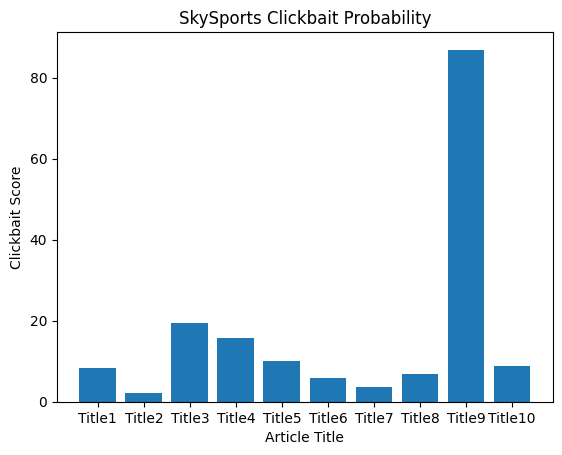

In [24]:
y_axis = ss_clickbait
x_axis = ['Title1', 'Title2', 'Title3', 'Title4', 'Title5', 'Title6', 'Title7', 'Title8', 'Title9', 'Title10']
plt.bar(x_axis, y_axis)
plt.title('SkySports Clickbait Probability')
plt.xlabel('Article Title')
plt.ylabel('Clickbait Score')
plt.show

# ESPN Clickbait Score Visuals:

<function matplotlib.pyplot.show(close=None, block=None)>

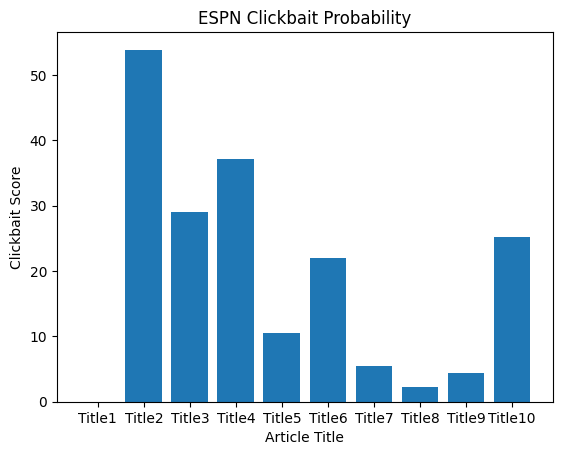

In [25]:
y_axis = espn_clickbait
x_axis = ['Title1', 'Title2', 'Title3', 'Title4', 'Title5', 'Title6', 'Title7', 'Title8', 'Title9', 'Title10']
plt.bar(x_axis, y_axis)
plt.title('ESPN Clickbait Probability')
plt.xlabel('Article Title')
plt.ylabel('Clickbait Score')
plt.show

# CBS Clickbait Score Visuals:

<function matplotlib.pyplot.show(close=None, block=None)>

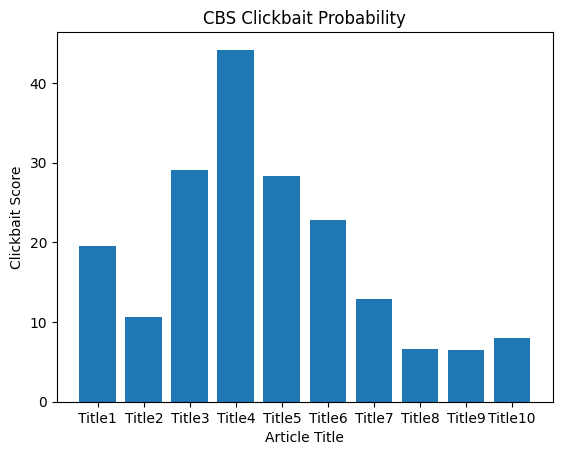

In [26]:
y_axis = cbs_clickbait
x_axis = ['Title1', 'Title2', 'Title3', 'Title4', 'Title5', 'Title6', 'Title7', 'Title8', 'Title9', 'Title10']
plt.bar(x_axis, y_axis)
plt.title('CBS Clickbait Probability')
plt.xlabel('Article Title')
plt.ylabel('Clickbait Score')
plt.show

# Control Website Clickbait Score Visual:

<function matplotlib.pyplot.show(close=None, block=None)>

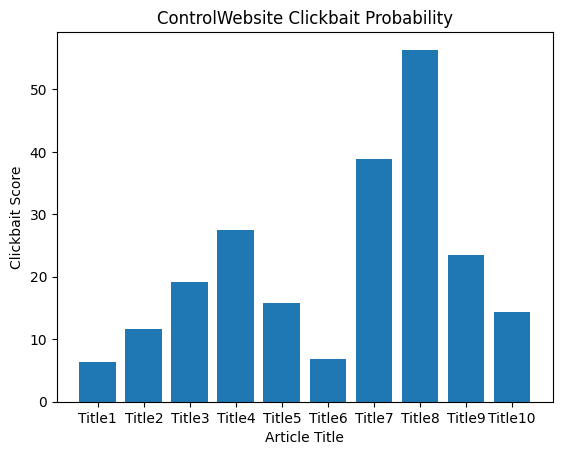

In [27]:
y_axis = cw_clickbait
x_axis = ['Title1', 'Title2', 'Title3', 'Title4', 'Title5', 'Title6', 'Title7', 'Title8', 'Title9', 'Title10']
plt.bar(x_axis, y_axis)
plt.title('ControlWebsite Clickbait Probability')
plt.xlabel('Article Title')
plt.ylabel('Clickbait Score')
plt.show

# SkySports Dataframe:

In [28]:
ss_df = pd.DataFrame(skysports)
ss_df['Title'] = skysports_titles
ss_df['Clickbait Score'] = ss_clickbait
ss_df['Polarity Score'] = ss_PolaritScore
ss_df

,0,Title,Clickbait Score,Polarity Score
0,https://www.skysports.com/football/news/11095/...,Lionel Messi to leave PSG at end of season wit...,8.26,"{'neg': 0.067, 'neu': 0.751, 'pos': 0.182, 'co..."
1,https://www.skysports.com/football/news/11675/...,Erling Haaland: Man City striker smashes Premi...,2.07,"{'neg': 0.065, 'neu': 0.85, 'pos': 0.085, 'com..."
2,https://www.skysports.com/football/news/11668/...,Udinese 1 - 1 Napoli - Match Report & Highlights,19.45,"{'neg': 0.018, 'neu': 0.772, 'pos': 0.21, 'com..."
3,https://www.skysports.com/football/news/11661/...,Jude Bellingham: Real Madrid in advanced talks...,15.61,"{'neg': 0.047, 'neu': 0.77, 'pos': 0.182, 'com..."
4,https://www.skysports.com/football/udinese-vs-...,Chelsea transfer news and rumours: Summer tran...,10.08,"{'neg': 0.088, 'neu': 0.798, 'pos': 0.114, 'co..."
5,https://www.skysports.com/football/news/11661/...,Arsenal target Declan Rice and Mason Mount aft...,5.82,"{'neg': 0.083, 'neu': 0.748, 'pos': 0.169, 'co..."
6,https://www.skysports.com/football/news/11095/...,Julian Nagelsmann: Tottenham held talks with e...,3.63,"{'neg': 0.037, 'neu': 0.788, 'pos': 0.175, 'co..."
7,https://www.skysports.com/football/news/11095/...,Man City Premier League charges explained: Wha...,6.80,"{'neg': 0.098, 'neu': 0.781, 'pos': 0.121, 'co..."
8,https://www.skysports.com/football/news/11095/...,Mikel Arteta: I don't know what will happen in...,86.88,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp..."
9,https://www.skysports.com/watch/video/sports/f...,Barcelona make Chelsea's Pierre-Emerick Aubame...,8.78,"{'neg': 0.004, 'neu': 0.813, 'pos': 0.183, 'co..."


# ESPN Dataframe:

In [29]:
espn_df = pd.DataFrame(espn)
espn_df['Title'] = espn_titles
espn_df['Clickbait Score'] = espn_clickbait
espn_df['Polarity Score'] = espn_PolaritScore
espn_df

,0,Title,Clickbait Score,Polarity Score
0,https://www.espn.com/soccer/blog-transfer-talk...,False,0.00,"{'neg': 0.095, 'neu': 0.757, 'pos': 0.148, 'co..."
1,https://www.espn.com/soccer/soccer-transfers/s...,Man City are on the verge of a historic treble...,53.86,"{'neg': 0.083, 'neu': 0.732, 'pos': 0.185, 'co..."
2,https://www.espn.com/soccer/soccer-transfers/s...,What Napoli's historic Serie A title means to ...,29.05,"{'neg': 0.107, 'neu': 0.717, 'pos': 0.176, 'co..."
3,https://www.espn690.com/sports/messi-apologize...,Summer transfer predictions: Bellingham to Mad...,37.16,"{'neg': 0.056, 'neu': 0.827, 'pos': 0.117, 'co..."
4,https://www.espn.com/soccer/manchester-city-en...,"Chelsea, Mauricio Pochettino in advanced talks...",10.52,"{'neg': 0.046, 'neu': 0.844, 'pos': 0.11, 'com..."
5,https://www.espn.com/soccer/blog-marcottis-mus...,Transfer Talk: West Ham's Rice tops Arsenal tr...,21.99,"{'neg': 0.011, 'neu': 0.834, 'pos': 0.155, 'co..."
6,https://www.espn.com/soccer/soccer-transfers/s...,Bayern replace Nagelsmann with Tuchel amid slu...,5.41,"{'neg': 0.035, 'neu': 0.842, 'pos': 0.123, 'co..."
7,https://www.espn.com/soccer/bayern-munich-gerb...,Man City charged for multiple FFP breaches by ...,2.31,"{'neg': 0.1, 'neu': 0.809, 'pos': 0.091, 'comp..."
8,https://www.espn.com/soccer/english-premier-le...,When can Manchester City win the Premier Leagu...,4.41,"{'neg': 0.012, 'neu': 0.709, 'pos': 0.279, 'co..."
9,https://www.espn.com/soccer/chelsea-engchelsea...,Chelsea sign Pierre-Emerick Aubameyang from Ba...,25.16,"{'neg': 0.058, 'neu': 0.795, 'pos': 0.146, 'co..."


# CBS Dataframe:

In [30]:
cbs_df = pd.DataFrame(cbssports)
cbs_df['Title'] = cbssports_titles
cbs_df['Clickbait Score'] = cbs_clickbait
cbs_df['Polarity Score'] = cbs_PolaritScore
cbs_df

,0,Title,Clickbait Score,Polarity Score
0,https://www.cbssports.com/soccer/news/borussia...,Lionel Messi to leave PSG: Angry fans in Paris...,19.49,"{'neg': 0.166, 'neu': 0.698, 'pos': 0.136, 'co..."
1,https://www.cbssports.com/soccer/news/antonio-...,"Erling Haaland, Julian Alvarez send Manchester...",10.59,"{'neg': 0.113, 'neu': 0.696, 'pos': 0.192, 'co..."
2,https://www.cbssports.com/soccer/news/mauricio...,Napoli win Serie A Scudetto: Sights and sounds...,29.07,"{'neg': 0.011, 'neu': 0.779, 'pos': 0.211, 'co..."
3,https://www.cbssports.com/soccer/news/pep-guar...,Borussia Dortmund's Jude Bellingham is the nex...,44.19,"{'neg': 0.056, 'neu': 0.722, 'pos': 0.221, 'co..."
4,https://www.cbssports.com/soccer/news/napoli-w...,Mauricio Pochettino to Chelsea: Why he makes s...,28.29,"{'neg': 0.063, 'neu': 0.744, 'pos': 0.194, 'co..."
5,https://www.cbssports.com/soccer/news/declan-r...,Declan Rice transfer: Arsenal on West Ham midf...,22.84,"{'neg': 0.046, 'neu': 0.665, 'pos': 0.289, 'co..."
6,https://www.cbssports.com/soccer/news/manchest...,Antonio Conte and Julian Nagelsmann firings la...,12.88,"{'neg': 0.019, 'neu': 0.861, 'pos': 0.12, 'com..."
7,https://www.cbssports.com/soccer/news/lionel-m...,Pep Guardiola 'fully convinced' Manchester Cit...,6.58,"{'neg': 0.093, 'neu': 0.693, 'pos': 0.214, 'co..."
8,https://www.cbssports.com/soccer/news/erling-h...,Manchester City crush Arsenal and stake a Prem...,6.54,"{'neg': 0.102, 'neu': 0.693, 'pos': 0.205, 'co..."
9,https://www.cbssports.com/soccer/news/soccer-t...,"Soccer transfer news, rumors: Chelsea chase Pi...",8.00,"{'neg': 0.056, 'neu': 0.757, 'pos': 0.187, 'co..."


# ControlWebsite Dataframe:

In [31]:
cw_df = pd.DataFrame(controlwebsites)
cw_df['Title'] = controlwebsites_title
cw_df['Clickbait Score'] = cw_clickbait
cw_df['Polarity Score'] = cw_PolaritScore
cw_df

,0,Title,Clickbait Score,Polarity Score
0,https://www.insider.com/erling-haaland-breaks-...,Lionel Messi Breaks Silence On PSG Suspension ...,6.37,"{'neg': 0.089, 'neu': 0.769, 'pos': 0.142, 'co..."
1,https://www.eurosport.com/football/transfers/2...,Erling Haaland Is Destroying Premier League Go...,11.58,"{'neg': 0.049, 'neu': 0.75, 'pos': 0.201, 'com..."
2,https://www.football.london/tottenham-hotspur-...,Napoli wins first Serie A title in 33 years af...,19.12,"{'neg': 0.01, 'neu': 0.714, 'pos': 0.276, 'com..."
3,https://www.si.com/soccer/2023/02/06/mancheste...,Bellingham gives up big money by choosing Real...,27.49,"{'neg': 0.033, 'neu': 0.865, 'pos': 0.102, 'co..."
4,https://www.cnn.com/2023/05/04/football/napoli...,Mauricio Pochettino meeting revealed as Chelse...,15.87,"{'neg': 0.047, 'neu': 0.805, 'pos': 0.147, 'co..."
5,https://www.msn.com/en-in/news/techandscience/...,"Declan Rice transfer news updates, reports and...",6.79,"{'neg': 0.083, 'neu': 0.821, 'pos': 0.096, 'co..."
6,https://www.mirror.co.uk/sport/football/news/t...,403 Forbidden,38.92,"{'neg': 0.051, 'neu': 0.837, 'pos': 0.113, 'co..."
7,https://www.marca.com/en/football/real-madrid/...,si.com,56.35,"{'neg': 0.135, 'neu': 0.728, 'pos': 0.137, 'co..."
8,https://www.sportingnews.com/us/soccer/news/de...,Arsenal have had an incredible season - losing...,23.44,"{'neg': 0.049, 'neu': 0.696, 'pos': 0.255, 'co..."
9,https://www.goal.com/en-us/lists/arsenal-incre...,Pierre-Emerick Aubameyang approaches Barcelona...,14.34,"{'neg': 0.127, 'neu': 0.773, 'pos': 0.1, 'comp..."


# Entire Dataframe

In [32]:
all_df = pd.DataFrame(all_urls)
all_df['Title'] = all_titles
all_df['Clickbait Score'] = all_clickbait
all_df['Polarity Score'] = all_PolaritScore
all_df

,All URL,Title,Clickbait Score,Polarity Score
0,https://www.skysports.com/football/news/11095/...,Lionel Messi to leave PSG at end of season wit...,8.26,"{'neg': 0.067, 'neu': 0.751, 'pos': 0.182, 'co..."
1,https://www.skysports.com/football/news/11661/...,Erling Haaland: Man City striker smashes Premi...,2.07,"{'neg': 0.065, 'neu': 0.85, 'pos': 0.085, 'com..."
2,https://www.skysports.com/football/udinese-vs-...,Udinese 1 - 1 Napoli - Match Report & Highlights,19.45,"{'neg': 0.018, 'neu': 0.772, 'pos': 0.21, 'com..."
3,https://www.skysports.com/football/news/11095/...,Jude Bellingham: Real Madrid in advanced talks...,15.61,"{'neg': 0.047, 'neu': 0.77, 'pos': 0.182, 'com..."
4,https://www.skysports.com/football/news/11668/...,Chelsea transfer news and rumours: Summer tran...,10.08,"{'neg': 0.088, 'neu': 0.798, 'pos': 0.114, 'co..."
5,https://www.skysports.com/football/news/11095/...,Arsenal target Declan Rice and Mason Mount aft...,5.82,"{'neg': 0.083, 'neu': 0.748, 'pos': 0.169, 'co..."
6,https://www.skysports.com/football/news/11675/...,Julian Nagelsmann: Tottenham held talks with e...,3.63,"{'neg': 0.037, 'neu': 0.788, 'pos': 0.175, 'co..."
7,https://www.skysports.com/football/news/11661/...,Man City Premier League charges explained: Wha...,6.80,"{'neg': 0.098, 'neu': 0.781, 'pos': 0.121, 'co..."
8,https://www.skysports.com/watch/video/sports/f...,Mikel Arteta: I don't know what will happen in...,86.88,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp..."
9,https://www.skysports.com/football/news/11095/...,Barcelona make Chelsea's Pierre-Emerick Aubame...,8.78,"{'neg': 0.004, 'neu': 0.813, 'pos': 0.183, 'co..."
